In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class DummyClassifiter(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [2]:
from sklearn import preprocessing

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

dum_clf = DummyClassifiter()
dum_clf.fit(X_train, y_train)
pred = dum_clf.predict(X_test)
print(f'Dummy Classifier\'s accuracy: {accuracy_score(y_test, pred): .4f}')

Dummy Classifier's accuracy:  0.7877


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class FakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [5]:
print('y_test.shape: ', y_test.shape)
print('test set\'s label and distribution')
print(pd.Series(y_test).value_counts())

fake_clf = FakeClassifier()
fake_clf.fit(X_train, y_train)
pred = fake_clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, pred): .3f}')

y_test.shape:  (450,)
test set's label and distribution
0    405
1     45
dtype: int64
accuracy:  0.900


In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[405,   0],
       [ 45,   0]])

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('confusion matrix')
    print(confusion)
    print(f'accuracy: {accuracy: .4f}, precision: {precision: .4f}, recall: {recall: .4f}')

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

confusion matrix
[[104  14]
 [ 13  48]]
accuracy:  0.8492, precision:  0.7742, recall:  0.7869


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba()\'s shape:\n {pred_proba.shape}')
print(f'pred_proba()\'s first 3 samples:\n {pred_proba[:3]}')

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print(f'pred_proba_result:\n {pred_proba_result[:3]}')

pred_proba()'s shape:
 (179, 2)
pred_proba()'s first 3 samples:
 [[0.46189204 0.53810796]
 [0.87872347 0.12127653]
 [0.87720675 0.12279325]]
pred_proba_result:
 [[0.46189204 0.53810796 1.        ]
 [0.87872347 0.12127653 0.        ]
 [0.87720675 0.12279325 0.        ]]


In [15]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [16]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix
[[104  14]
 [ 13  48]]
accuracy:  0.8492, precision:  0.7742, recall:  0.7869


In [17]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix
[[98 20]
 [10 51]]
accuracy:  0.8324, precision:  0.7183, recall:  0.8361


In [19]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
       binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
       custom_predict = binarizer.transform(pred_proba_c1)
       print('threshold: ', custom_threshold)
       get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


threshold:  0.4
confusion matrix
[[98 20]
 [10 51]]
accuracy:  0.8324, precision:  0.7183, recall:  0.8361
threshold:  0.45
confusion matrix
[[103  15]
 [ 12  49]]
accuracy:  0.8492, precision:  0.7656, recall:  0.8033
threshold:  0.5
confusion matrix
[[104  14]
 [ 13  48]]
accuracy:  0.8492, precision:  0.7742, recall:  0.7869
threshold:  0.55
confusion matrix
[[109   9]
 [ 15  46]]
accuracy:  0.8659, precision:  0.8364, recall:  0.7541
threshold:  0.6
confusion matrix
[[112   6]
 [ 16  45]]
accuracy:  0.8771, precision:  0.8824, recall:  0.7377


In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

In [21]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(f'thresholds.shape: {thresholds.shape}')

thr_index = np.arange(0, thresholds.shape[0], 15)
print('thr_index: ', thr_index)
print('thresholds: ', np.round(thresholds[thr_index], 2))

print('precisions: ', np.round(precisions[thr_index], 3))
print('recalls: ', np.round(recalls[thr_index], 3))

thresholds.shape: (143,)
thr_index:  [  0  15  30  45  60  75  90 105 120 135]
thresholds:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
precisions:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
recalls:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


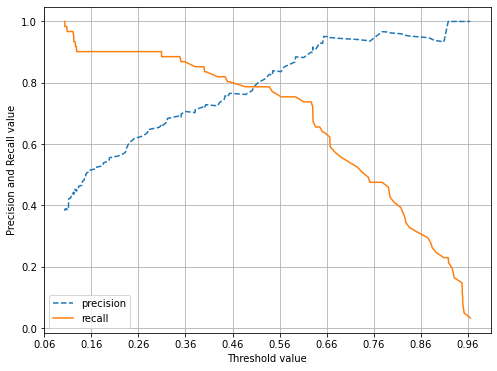

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [32]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('f1 score: ', '{0: 4f}'.format(f1))

f1 score:   0.780488


In [36]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('confusion matrix')
    print(confusion)
    print(f'accuracy: {accuracy: .4f}, precision: {precision: .4f}, recall: {recall: .4f}, f1: {f1: .4f}')

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

threshold:  0.4
confusion matrix
[[98 20]
 [10 51]]
accuracy:  0.8324, precision:  0.7183, recall:  0.8361, f1:  0.7727
threshold:  0.45
confusion matrix
[[103  15]
 [ 12  49]]
accuracy:  0.8492, precision:  0.7656, recall:  0.8033, f1:  0.7840
threshold:  0.5
confusion matrix
[[104  14]
 [ 13  48]]
accuracy:  0.8492, precision:  0.7742, recall:  0.7869, f1:  0.7805
threshold:  0.55
confusion matrix
[[109   9]
 [ 15  46]]
accuracy:  0.8659, precision:  0.8364, recall:  0.7541, f1:  0.7931
threshold:  0.6
confusion matrix
[[112   6]
 [ 16  45]]
accuracy:  0.8771, precision:  0.8824, recall:  0.7377, f1:  0.8036


In [38]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)

print('threshold index: ', thr_index)
print('threshold', np.round(thresholds[thr_index], 2))

print('fpr per threshold: ', np.round(fprs[thr_index], 3))
print('tpr per threshold: ', np.round(tprs[thr_index], 3))

threshold index:  [ 1  6 11 16 21 26 31 36 41 46 51]
threshold [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
fpr per threshold:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
tpr per threshold:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


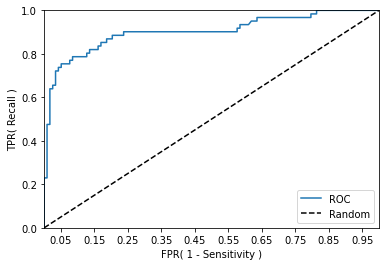

In [39]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

In [40]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC: {roc_score: .4f}')

ROC AUC:  0.9024


In [41]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)
    print(f'accuracy: {accuracy: .4f}, precision: {precision: .4f}, recall: {recall: .4f}, f1: {f1: .4f}, roc_auc: {roc_auc: .4f}')
